In [1]:
%load_ext autoreload
%autoreload 2

# Explorateur de données

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from CinePred.data.featuring import *
from CinePred.data.preprocessing import *
from CinePred.data.importing import *

/home/oscartouze/.pyenv/versions/3.8.12/envs/cinepred/lib/python3.8/site-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


## Import le dataframe

In [3]:
print('----- import Data -----')
df = import_data("../raw_data/IMDb movies.csv")

print('----- keep columns -----')
df = keep_columns(df,
                  column_names=[
                      'imdb_title_id', 'title', 'year', 'date_published',
                      'genre', 'duration', 'country', 'director', 'writer',
                      'production_company', 'actors', 'budget',
                      'worlwide_gross_income'
                  ])

print('----- remove na rows -----')
df = remove_na_rows(df)

print('----- convert budget -----')
df['budget'] = convert_budget_column(df[['budget']])

print('----- reduce column type -----')
df['actors'] = reduce_column_type(df[['actors']], nb_max=3)

print('----- convert income column -----')
df['worlwide_gross_income'] = convert_income(df[['worlwide_gross_income']])

print('----- convert to int -----')
df['year'] = convert_to_int(df[['year']])
df['duration'] = convert_to_int(df[['duration']])

print('----- convert to date -----')
df['date_published'] = convert_to_date(df[['date_published']])

print('----- reset index -----')
df = reset_index(df)

print('----- log transform -----')
df['worlwide_gross_income'] = log_transformation(
    df[['worlwide_gross_income']])

print('----- data_shape -----')

----- import Data -----
../raw_data/IMDb movies.csv


/tmp/ipykernel_7239/2090781426.py:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = import_data("../raw_data/IMDb movies.csv")


----- keep columns -----
----- remove na rows -----
----- convert budget -----
../raw_data/currencies.csv
----- reduce column type -----
----- convert income column -----
----- convert to int -----
----- convert to date -----
----- reset index -----
----- log transform -----
----- data_shape -----


In [4]:
!ls ../raw_data/

 cat_acteur.csv			  first_39k_to_42k_movies.csv
 currencies.csv			 'IMDb movies.csv'
 currencies.csv:Zone.Identifier   movie_ids_11_22_2021.json
 DF_3_acteurs.csv		  movie_ids_11_22_2021.json.gz
 DF_films_par_acteur.csv	  movie_ids_11_22_2021.json.gz:Zone.Identifier
 DF_films_par_acteur_suite.csv	 'preproc (1).csv:Zone.Identifier'
 first_15k_movies.csv		  preproc.csv
 first_15k_to_32k_movies.csv	  preproc.csv:Zone.Identifier
 first_32k_to_39k_movies.csv


In [8]:
import_data("../raw_data/currencies.csv")

../raw_data/currencies.csv


,in,out,value
0,$,USD,1.000000
1,IEP,USD,1.423136
2,BEF,USD,0.027784
3,FIM,USD,0.188507
4,NLG,USD,0.508602
...,...,...,...
155,UYU,USD,0.022690
156,UZS,USD,0.000093
157,VND,USD,0.000044
158,YER,USD,0.003996


In [9]:
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Marilyn Monroe, Tony Curtis, Jack Lemmon",18000,3.945025
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Dean Martin, Kim Novak, Ray Walston",27887,3.630631
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Barbara Dennek, Jacques Tati, Rita Maiden",800000,6.963016
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Tony Curtis, Henry Fonda, George Kennedy",250000,4.430011
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Steve McQueen, Dustin Hoffman, Victor Jory",351000,4.050496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,NaN,402722,5.025027
12566,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,NaN,402722,3.409595
12567,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,Animation,100,Malaysia,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...","Hjh. Ainon Ariff, Nur Naquyah bt Burhanuddin",Les' Copaque Production,NaN,4729812,4.923539
12568,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,NaN,3221779,5.719382


In [10]:
df[df['title'].str.contains("Titanic")]

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
2668,tt0120338,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada",James Cameron,James Cameron,Twentieth Century Fox,NaN,200000000,9.341468


# Plot

In [11]:
# liste_acteurs = []
# liste_complete = []
# for i in range(df.shape[0]):
#     liste_acteurs.append((df['actors'][i].split(", ")))
#     for name in liste_acteurs[i]:
#         liste_complete.append(name)

AttributeError: 'float' object has no attribute 'split'

In [12]:
# actors_df = pd.DataFrame(liste_complete)

In [13]:
# liste_acteurs

## Nombre de films par acteurs

In [14]:
# pd.DataFrame(actors_df.value_counts().head(100))

NameError: name 'actors_df' is not defined

### Répartition des films par acteurs (100 premiers)

In [15]:
# actors_df.value_counts()

## Budget over revenue

<AxesSubplot:xlabel='budget', ylabel='worlwide_gross_income'>

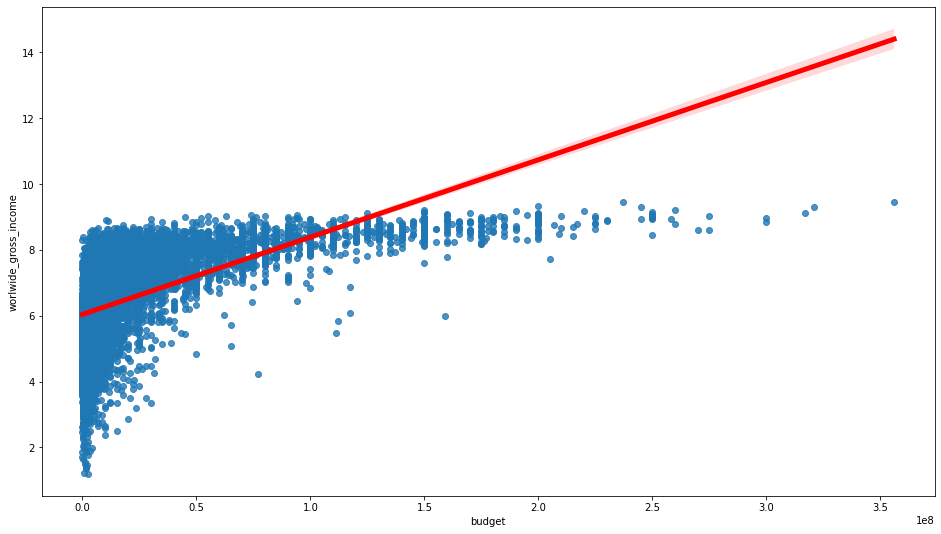

In [16]:
fig = plt.figure(figsize=(16,9))
sns.regplot(x = "budget", y = "worlwide_gross_income",data=df, line_kws={"lw":5, "color":"red"})

## Répartition par mois

In [17]:
df_revenue_per_month = df.groupby(by="Month_published").sum()[['worlwide_gross_income']].reset_index()
df_budget_per_month = df.groupby(by="Month_published").sum()[['budget']].reset_index()

KeyError: 'Month_published'

In [ ]:
df_budget_revenue = df_revenue_per_month.merge(right =df_budget_per_month, how='right', on ="Month_published")

In [18]:
df_budget_revenue

NameError: name 'df_budget_revenue' is not defined

In [19]:
plt.figure(figsize=(16,9))
sns.barplot(x = df_budget_revenue['Month_published'] ,y = df_budget_revenue["worlwide_gross_income"])

NameError: name 'df_budget_revenue' is not defined

<Figure size 1152x648 with 0 Axes>

In [20]:
plt.figure(figsize=(16,9))

sns.histplot(df['Month_published'], bins=12)

KeyError: 'Month_published'

<Figure size 1152x648 with 0 Axes>

# Features

## Films par acteurs

In [ ]:
len(liste_acteurs)

In [ ]:
liste_complete = list(dict.fromkeys(liste_complete))

In [ ]:
df_actor_title = df[['actors','title','year','Month_published','budget','worlwide_gross_income']]
df_actor_title['actors'].str.split(', ')

# Merge des deux dataframe

In [ ]:
acteurs_df = pd.read_csv('../raw_data/cat_acteur.csv')

In [ ]:
acteurs_df

In [ ]:
acteurs_df['ratio'] = acteurs_df['income']/acteurs_df['budget']

In [ ]:
acteurs_df_cat = acteurs_df.loc[(acteurs_df['ratio']>=5) & (acteurs_df['budget'] >= 100_000_000)]

In [ ]:
len(acteurs_df_cat['acteur_name'].unique())

In [ ]:
acteurs_df_cat[['acteur_name','budget']].groupby(by='acteur_name').sum().sort_values(by="budget", ascending=False).head(159)

In [ ]:
top_tier_actor_df = acteurs_df.groupby(by="acteur_name").sum()[['budget']].sort_values("budget", ascending=False)

In [ ]:
top_tier_actor_df

In [ ]:
def connupaconnu(X, ratio = 3):
    if (X['budget'] >= 100_000_000) & (X['ratio'] >= 3):
        return 1
    return 0

In [ ]:
acteurs_df.sort_values('year', ascending=True, inplace= True)

In [ ]:
acteurs_df['connu'] = acteurs_df.apply(connupaconnu, axis = 1)

In [ ]:
acteurs_df['nbsucces'] = acteurs_df['connu']

In [ ]:
new_df = acteurs_df

In [ ]:
new_df['nbsuccess'] = acteurs_df.groupby(by  ='acteur_name')['connu'].cumsum(axis = 0)

In [ ]:
new_df = new_df.sort_values('year', ascending=True)

In [ ]:
new_df.drop(columns='nbsucces', inplace = True)

In [ ]:
new_df['connu2'] = new_df['nbsuccess'].apply(lambda x : 1 if x >=1 else 0)

In [ ]:
new_df.drop(columns="connu", inplace = True)

In [ ]:
new_df.rename(columns={"connu2" : "connu"}, inplace=True)

In [ ]:
new_df[new_df['acteur_name'].str.contains('Chris Evans')]

In [ ]:
new_df['totalsuccess'] = new_df.groupby(by = 'title').cumsum()['shifted']

In [ ]:
new_df

In [ ]:
total_success = pd.DataFrame(new_df.groupby(['title'], sort = False)['shifted'].max())

In [ ]:
total_success.reset_index(inplace = True)

In [ ]:
total_success

In [ ]:
df = df.merge(right=total_success, on='title', how = "right")

In [ ]:
df

## Recherche par titre de films

In [ ]:
total_success[total_success['title'].str.contains('Fast')]

## Recherche par nom d'acteur

In [ ]:
df[['actors','title','shifted']][df['actors'].str.contains('Leonardo DiCaprio')]

# testing